In [93]:
import pandas as pd

In [94]:
train_df = pd.read_csv('iris.csv')
train_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [95]:
for i in range(len(train_df['Name'])):
  if train_df['Name'][i] == 'Iris-setosa': train_df['Name'][i] = 0
  if train_df['Name'][i] == 'Iris-versicolor': train_df['Name'][i] = 1
  if train_df['Name'][i] == 'Iris-virginica': train_df['Name'][i] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [96]:
import numpy as np

for i in train_df:
  train_df[i] = np.asarray(train_df[i]).astype('float32')

train, val, test = np.split(train_df.sample(frac=1, random_state=1), [int(0.7*len(train_df)), int(0.9*len(train_df))]) 

In [97]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
14,5.8,4.0,1.2,0.2,0.0
98,5.1,2.5,3.0,1.1,1.0
75,6.6,3.0,4.4,1.4,1.0
16,5.4,3.9,1.3,0.4,0.0
131,7.9,3.8,6.4,2.0,2.0


In [98]:
val.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
26,5.0,3.4,1.6,0.4,0.0
76,6.8,2.8,4.8,1.4,1.0
43,5.0,3.5,1.6,0.6,0.0
24,4.8,3.4,1.9,0.2,0.0
136,6.3,3.4,5.6,2.4,2.0


In [99]:
test.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
96,5.7,2.9,4.2,1.3,1.0
68,6.2,2.2,4.5,1.5,1.0
50,7.0,3.2,4.7,1.4,1.0
101,5.8,2.7,5.1,1.9,2.0
20,5.4,3.4,1.7,0.2,0.0


In [100]:
print(train.shape[0])
print(val.shape[0])
print(test.shape[0])

105
30
15


In [101]:
train_y, train_X = train['SepalLength'], train.drop(columns=['SepalLength'])
val_y, val_X = val['SepalLength'], val.drop(columns=['SepalLength'])
test_y, test_X = test['SepalLength'], test.drop(columns=['SepalLength'])

Побудуємо модель

In [102]:
from keras.models import Sequential
from keras.layers import Dense

In [103]:
models = []
neurons = 20

for i in range(4):
  models.append(Sequential([
                      Dense(neurons, activation='relu', input_shape=(train_X.shape[1],)),
                      Dense(neurons, activation='relu'),
                      Dense(neurons, activation='relu'),
                      Dense(1)
  ]))

  models[i].compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  neurons *= 2

In [104]:
validation_data = (val_X, val_y)
EPOCHS = 50
histories = []

for i in range(4):
    histories.append(models[i].fit(train_X, train_y, validation_data=validation_data, epochs=EPOCHS))

Epoch 1/50
4/4 [==============================] - 1s 55ms/step - loss: 57.4313 - mae: 7.3662 - val_loss: 39.4010 - val_mae: 6.0952
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 48.1087 - mae: 6.7624 - val_loss: 33.3610 - val_mae: 5.6309
Epoch 3/50
4/4 [==============================] - 0s 8ms/step - loss: 40.6728 - mae: 6.2347 - val_loss: 28.2446 - val_mae: 5.2018
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 33.9737 - mae: 5.7156 - val_loss: 23.4124 - val_mae: 4.7588
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: 27.6797 - mae: 5.1776 - val_loss: 19.2508 - val_mae: 4.3364
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 22.6868 - mae: 4.7029 - val_loss: 16.1902 - val_mae: 3.9889
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 18.8821 - mae: 4.3025 - val_loss: 13.5900 - val_mae: 3.6603
Epoch 8/50
4/4 [==============================] - 0s 8ms/step - loss: 15.7560 - mae: 3.9

Побудуємо графіки точності

In [105]:
import matplotlib.pyplot as plt

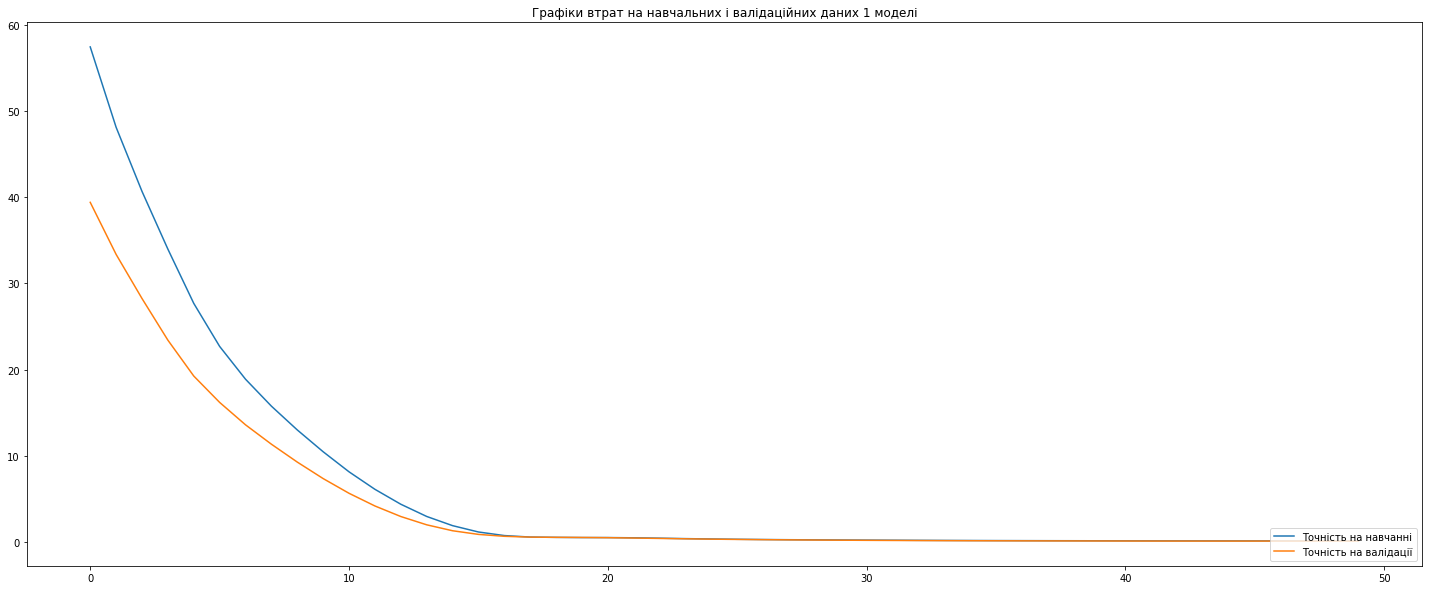

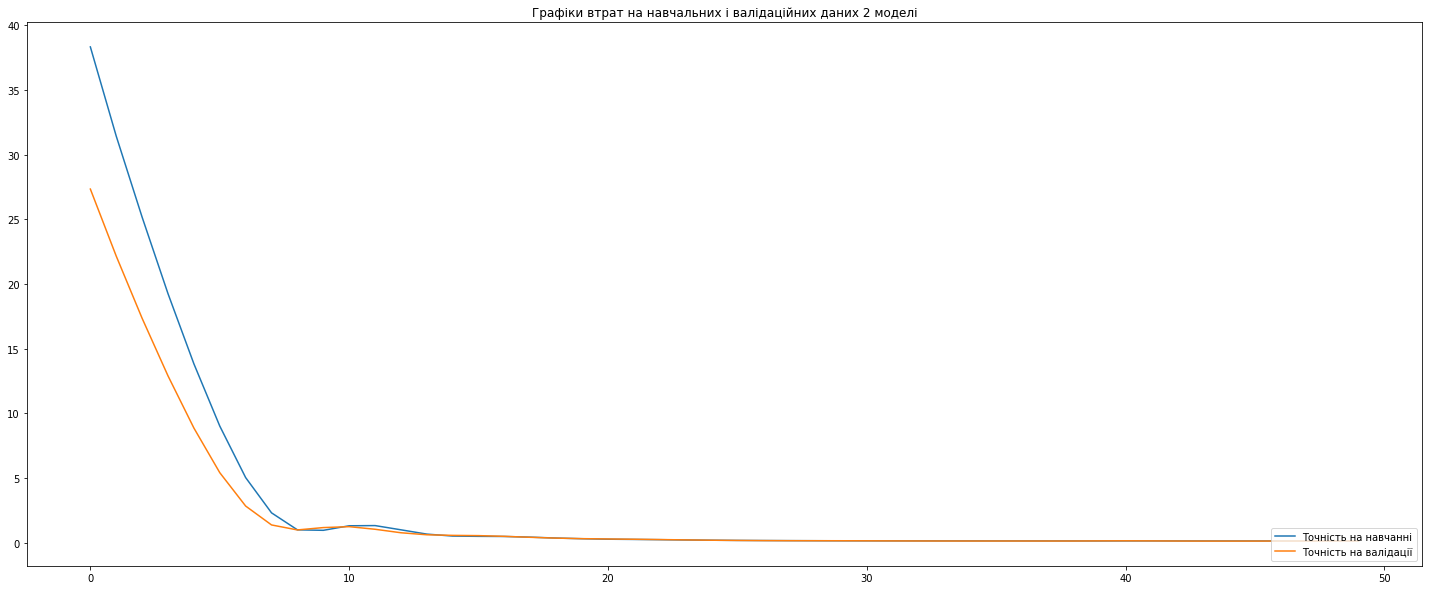

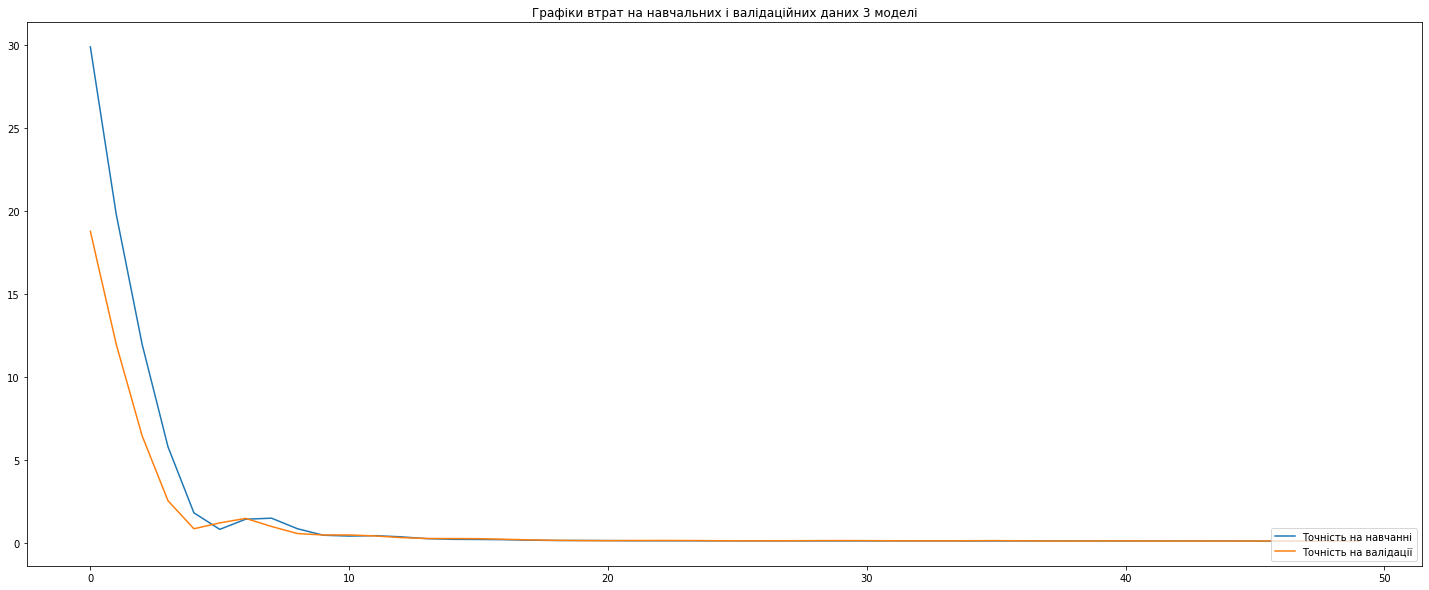

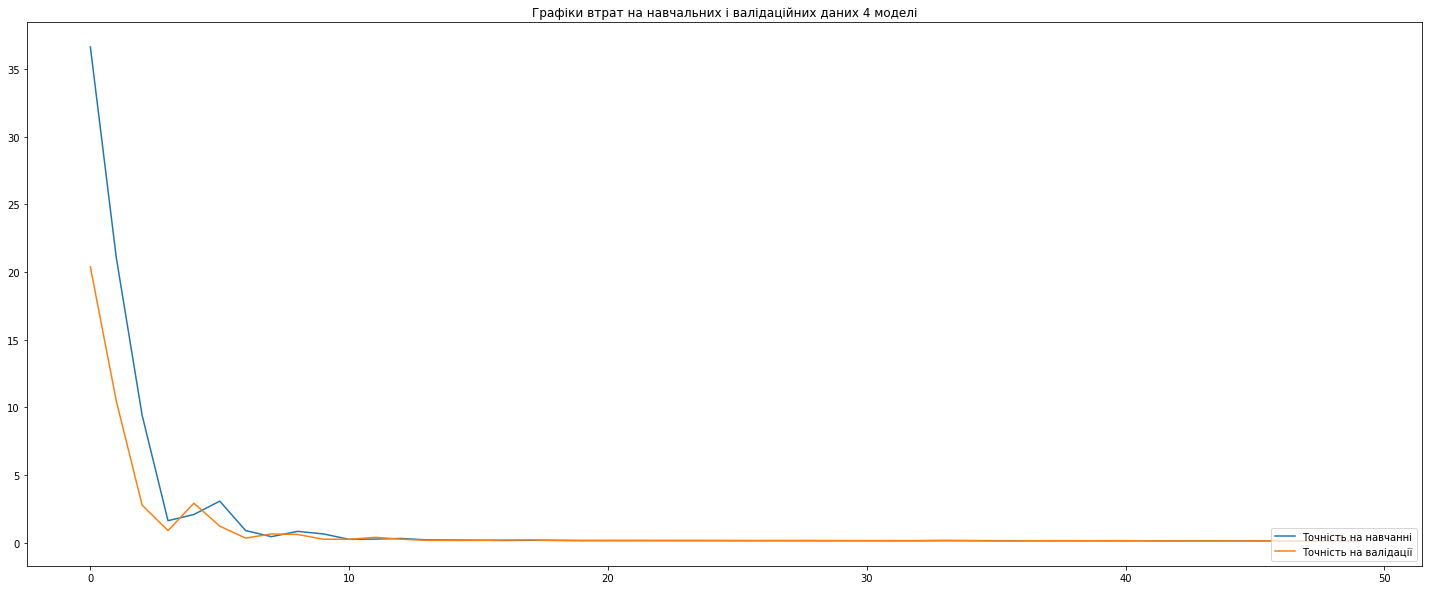

In [106]:
counter = 0
for i in histories:
  counter += 1
  loss = i.history['loss']
  val_loss = i.history['val_loss']
  
  epochs_range = range(EPOCHS)

  plt.figure(figsize=(25,10))
  plt.plot(epochs_range, loss, label='Точність на навчанні')
  plt.plot(epochs_range, val_loss, label='Точність на валідації')
  plt.legend(loc='lower right')
  plt.title(f'Графіки втрат на навчальних і валідаційних даних {counter} моделі')

In [113]:
predictions = (models[0].predict(test_X))
test_y = pd.DataFrame(test_y)
counter = 0
for i in test_y['SepalLength']:
  print(f"Точне значення: {i}, передбачуване значення: {predictions[counter][0]}")
  counter += 1

# for i in range(0,len(test_y)):
# 	print("Точне значення: {0}, передбачуване значення: {1}".format(test_y[i], predictions[i][0]))

Точне значення: 5.699999809265137, передбачуване значення: 6.01221227645874
Точне значення: 6.199999809265137, передбачуване значення: 5.676867961883545
Точне значення: 7.0, передбачуване значення: 6.68641471862793
Точне значення: 5.800000190734863, передбачуване значення: 6.0499587059021
Точне значення: 5.400000095367432, передбачуване значення: 5.120497703552246
Точне значення: 5.0, передбачуване значення: 4.665716648101807
Точне значення: 6.099999904632568, передбачуване значення: 6.3067450523376465
Точне значення: 6.099999904632568, передбачуване значення: 5.761259078979492
Точне значення: 7.199999809265137, передбачуване значення: 6.778338432312012
Точне значення: 5.699999809265137, передбачуване значення: 5.1840715408325195
Точне значення: 6.300000190734863, передбачуване значення: 6.013370513916016
Точне значення: 6.400000095367432, передбачуване значення: 6.611080646514893
Точне значення: 6.300000190734863, передбачуване значення: 6.246467590332031
Точне значення: 6.69999980926

In [112]:
for i in range(4):
  data = models[i].evaluate(test_X, test_y)
  print(f'Model {i+1} loss: {data[0]}, mae: {data[1]}')



1/1 [==============================] - 0s 18ms/step - loss: 0.1012 - mae: 0.2928
Model 1 loss: 0.10116251558065414, mae: 0.2927583158016205
1/1 [==============================] - 0s 17ms/step - loss: 0.1671 - mae: 0.3611
Model 2 loss: 0.1670624166727066, mae: 0.36114344000816345
1/1 [==============================] - 0s 20ms/step - loss: 0.1739 - mae: 0.3791
Model 3 loss: 0.1738898605108261, mae: 0.3790982961654663
1/1 [==============================] - 0s 17ms/step - loss: 0.1784 - mae: 0.3677
Model 4 loss: 0.17842859029769897, mae: 0.36769717931747437
